# MC866 Project 1

## PART I - Clustering Methods

https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68

## Clustering using Expectation–Maximization (EM) Gaussian Mixture Model (GMM)

In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import decomposition
import matplotlib
import math
import time
import matplotlib.cm as cm
from scipy.stats import multivariate_normal
from scipy.special import logsumexp
from sklearn.datasets import fetch_openml
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.mixture import GaussianMixture

In [2]:
class GMM:
    def __init__(self, data, n_clusters=3, random_state=None):
        self.n_clusters = n_clusters
        self.data = data
        self.rand = np.random.RandomState(random_state)
        self.means = []
        self.covs = []
        cluster = np.array_split(self.rand.permutation(self.data), self.n_clusters)
        for c in cluster:
            self.means = np.append(self.means, np.mean(c, axis=0))
            self.covs = np.append(self.covs, np.cov(c.T))
        self.means = self.means.reshape(self.n_clusters, self.data.shape[1])
        self.covs = self.covs.reshape(self.n_clusters, self.data.shape[1], self.data.shape[1])
        
    def __probabilities_by_cluster(self, data=None):
        if data is None:
            data = self.data

        probabilities = np.array([])
        for i in range(0, self.n_clusters):
            var = multivariate_normal(mean=self.means[i], cov=self.covs[i], allow_singular=True)
            probabilities = np.append(probabilities, np.array(list(map(var.pdf, data))))#np.array([var.pdf(d) for d in data]))
        
        probabilities = probabilities.reshape((self.n_clusters, len(data)))
        return probabilities.T

    def aic(self):
        probabilities = self.__probabilities_by_cluster()
        probabilities = np.max(probabilities, axis=1) # get only the max probability for each data point
        score = np.log(probabilities).sum()
        return -2*score + 2*self.n_clusters

    def bic(self):
        probabilities = self.__probabilities_by_cluster()
        probabilities = np.max(probabilities, axis=1) # get only the max probability for each data point
        score = np.log(probabilities).sum()
        return -2*score + self.n_clusters*math.log(self.data.shape[0]) 

    def clusters(self, data=None):
        probabilities = self.__probabilities_by_cluster(data=data)
        return np.argmax(probabilities, axis=1) 

    def fit(self):
        start_time = time.time()
        iterations = 0
        while True:
            iterations += 1
            if iterations == 50:
                break
            clusters = self.clusters()
            changed = False
            for i in range(0, self.n_clusters):
                data_filter = clusters == i
                filtered_data = self.data[data_filter] # only data that belongs to the cluster
                if len(filtered_data) > 1: # can't calculate cov matrix for only one data point
                    mean = np.mean(filtered_data, axis=0)
                    cov = np.cov(filtered_data.T)
                    for j in range (0, mean.shape[0]):
                        if self.means[i][j] != mean[j]:
                            changed = True
                            self.means[i][j] = mean[j]
                            self.covs[i] = cov
                        
            if not changed:
                break
        
        print(f"converged in {iterations} iterations")
        print("--- %s seconds ---" % (time.time() - start_time))

### The Dataset
First we will run tests using the provided 2d dataset, splitting it in 90% for training and 10% for test.

Afterwards we'll run the same proccess on another dataset with more dimensions.

In [3]:
df = pd.read_csv("./data/cluster.dat", sep=' ', header=None)
df.head()

msk = np.random.rand(len(df)) < 0.9 # split dataset (90% train and 10% test)

df_train = df[msk]
df_test = df[~msk]

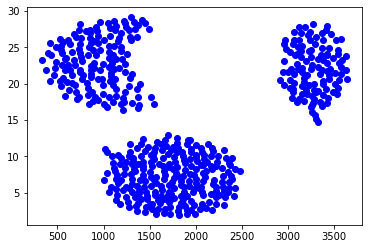

In [4]:
# 2D dataset

fig, ax = plt.subplots()
ax.scatter(df_train.iloc[:,:1].values, df_train.iloc[:,1:].values, c="blue") # the data
plt.show()

By observing the visualization of the dataset, we can verify that 3 clusters would be adequate.

In [5]:
gmm = GMM(data=df_train.to_numpy(), n_clusters=3)

The clusters are initialy initialized with random points of the dataset provided for training.

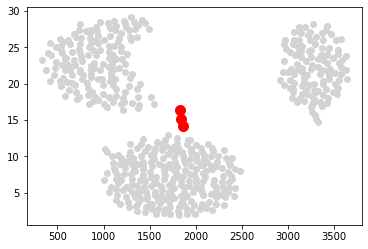

In [6]:
# initialize clusters and show their initial position in the chart    
fig, ax = plt.subplots()
ax.scatter(df_train.iloc[:,:1].values, df_train.iloc[:,1:].values, c="lightgray") # the data
ax.scatter(gmm.means[:,:1], gmm.means[:,1:], c="red", s=100) # the mean of each cluster
plt.show()

We use the clusters() method to get which cluster each data point has the highest probability of belonging

In [7]:
gmm.clusters()

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

Initially without any fitting, the clusters provided are the following

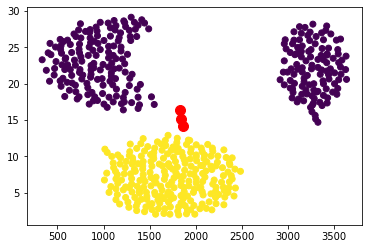

In [8]:
# initialize clusters and show their initial position in the chart

c = gmm.clusters()

fig, ax = plt.subplots()
ax.scatter(df_train.iloc[:,:1].values, df_train.iloc[:,1:].values, c=c) # the data
ax.scatter(gmm.means[:,:1], gmm.means[:,1:], c="red", s=100) # the mean of each cluster
plt.show()

In [9]:
gmm.fit()

converged in 14 iterations
--- 0.5981638431549072 seconds ---


### Results after fitting with the raw training data

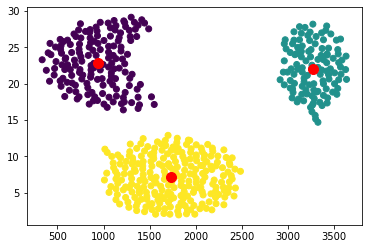

In [10]:
# Result of clusters after fitting is done

c = gmm.clusters()

fig, ax = plt.subplots()
ax.scatter(df_train.iloc[:,:1].values, df_train.iloc[:,1:].values, c=c) # the data
ax.scatter(gmm.means[:,:1], gmm.means[:,1:], c="red", s=100) # the mean of each cluster
plt.show()

As we can see, despite the fact that X and Y are on different scales, the GMM algorithm converged to optimal clusters even without a prior data normalization (unlike k-means)

## Checking the test data distribution

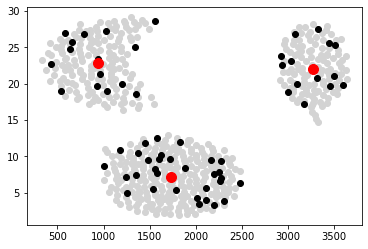

In [11]:
# the test data
fig, ax = plt.subplots()
ax.scatter(df_train.iloc[:,:1].values, df_train.iloc[:,1:].values, c="lightgray") # the data
ax.scatter(df_test.iloc[:,:1].values, df_test.iloc[:,1:].values, c="black") # the data
ax.scatter(gmm.means[:,:1], gmm.means[:,1:], c="red", s=100) # the mean of each cluster
plt.show()

## How the test data was classified using the prefitted gaussian mixture model

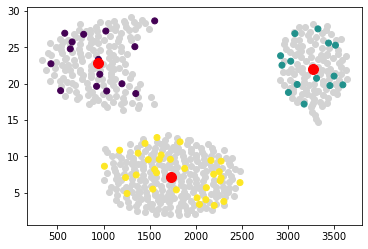

In [12]:
c = gmm.clusters(data=df_test.to_numpy())

fig, ax = plt.subplots()
ax.scatter(df_train.iloc[:,:1].values, df_train.iloc[:,1:].values, c="lightgray") # the data
ax.scatter(df_test.iloc[:,:1].values, df_test.iloc[:,1:].values, c=c) # the data
ax.scatter(gmm.means[:,:1], gmm.means[:,1:], c="red", s=100) # the mean of each cluster
plt.show()

### Metrics

Now we will verify the results using a few metrics.

### The AIC/BIC Method
We'll run the GMM algorithm with different amounts of clusters and calculate the AIC and BIC metrics for every run, where:

AIC = -2*ln(L)+ p*ln(N)  
BIC = 2*p - 2*ln(L)

The actual value of these two metrics doesn't mean anything, we're only concerned with the diference between the two (We want the number of cluster that minimizes the diference between these metrics).

converged in 2 iterations
--- 0.04358696937561035 seconds ---
converged in 2 iterations
--- 0.05251193046569824 seconds ---
converged in 2 iterations
--- 0.07461309432983398 seconds ---
converged in 23 iterations
--- 1.1606998443603516 seconds ---
converged in 19 iterations
--- 1.1825151443481445 seconds ---
converged in 15 iterations
--- 1.1157810688018799 seconds ---
converged in 23 iterations
--- 2.0162711143493652 seconds ---
converged in 35 iterations
--- 3.765530824661255 seconds ---
converged in 19 iterations
--- 2.3615920543670654 seconds ---


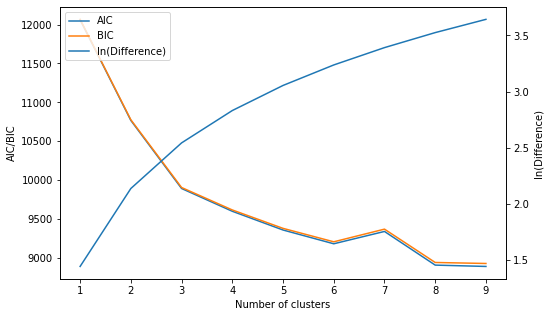

In [13]:
aic_values = []
bic_values = []
cluster_range = range(1, 10)
for i in cluster_range:
    gmm = GMM(data=df_train.to_numpy(), n_clusters=i)
    gmm.fit()
    aic_values.append(gmm.aic())
    bic_values.append(gmm.bic())

fig, ax = plt.subplots(figsize=(8,5))
ax2 = ax.twinx()

ax.set_xlabel("Number of clusters")
ax.set_ylabel("AIC/BIC")
ax2.set_ylabel("ln(Difference)")
p1, = ax.plot(cluster_range, aic_values, label="AIC") # the data
p2, = ax.plot(cluster_range, bic_values, label="BIC") # the data
p3, = ax2.plot(cluster_range, np.log(np.subtract(bic_values, aic_values)), label="ln(Difference)") # the data
plt.legend(handles=[p1, p2, p3])
plt.show()

We can verify that the difference between the AIC and BIC methods starts to increase for n_clusters > 3 (more easily verified by the natural logarithm of the difference between AIC and BIC), so we can assume that 3 is the optimal number of clusters.

## Second problem
Now we'll tackle a problem with many more dimensions using clustering algorithms. As a proposed problem we'll attempt to solve the handwritten digits dataset using only unsupervised clustering.

We are using the skelearn digits dataset because it's an already scalled down version of the MNIST dataset, where each image has only 64 features, greatly reducing the time required to fit the models.

Since there are 10 classes in the dataset (the ten digits), an intuitive value for n_clusters would be 10, but we will validate that value using the analysis that we showed previously.

First we'll fetch the *digits* dataset from scikit, and do normalizations

Features 64
[[0.     0.     0.     ... 0.1875 0.     0.    ]
 [0.     0.     0.     ... 0.     0.     0.    ]
 [0.     0.     0.     ... 0.125  0.     0.    ]
 ...
 [0.     0.     0.1875 ... 0.4375 0.     0.    ]
 [0.     0.     0.     ... 0.375  0.     0.    ]
 [0.     0.     0.375  ... 0.5625 0.     0.    ]]


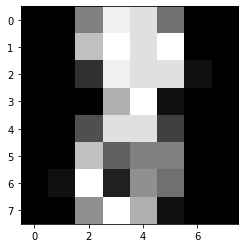

In [14]:
X, y = load_digits(return_X_y=True) # fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False) # 
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.1)
# since we know that the maximum value of a pixel in the dataset is 255, we'll just divide everything by 255 for scaling.
scalling_factor = np.max(X_train)
X_train = X_train / scalling_factor
X_test = X_test / scalling_factor
print("Features", X_train.shape[1])
print(X_test)

plt.imshow(X_train[2].reshape((8,8)), cmap='gray', vmin=0, vmax=1)
plt.show()

converged in 1 iterations
--- 0.07460808753967285 seconds ---
converged in 5 iterations
--- 0.7356569766998291 seconds ---
converged in 50 iterations
--- 10.60749888420105 seconds ---
converged in 50 iterations
--- 13.23172116279602 seconds ---
converged in 25 iterations
--- 8.226247787475586 seconds ---
converged in 50 iterations
--- 18.9493248462677 seconds ---
converged in 50 iterations
--- 22.391422033309937 seconds ---
converged in 50 iterations
--- 25.431060075759888 seconds ---
converged in 50 iterations
--- 29.00039505958557 seconds ---
converged in 50 iterations
--- 32.059478759765625 seconds ---
converged in 50 iterations
--- 35.58128905296326 seconds ---
converged in 50 iterations
--- 39.15855097770691 seconds ---
converged in 50 iterations
--- 41.32036113739014 seconds ---
converged in 50 iterations
--- 42.43283200263977 seconds ---


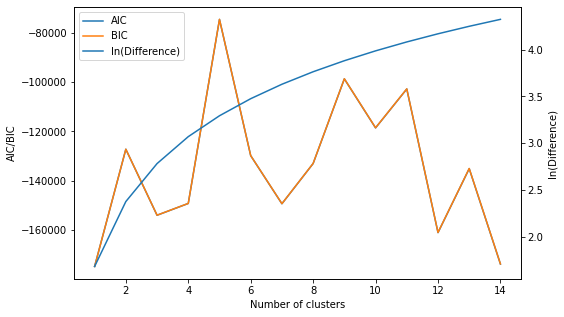

In [15]:
aic_values = []
bic_values = []
cluster_range = range(1, 15)
for i in cluster_range:
    gmm = GMM(data=X_train, n_clusters=i)
    gmm.fit()
    aic_values.append(gmm.aic())
    bic_values.append(gmm.bic())

fig, ax = plt.subplots(figsize=(8,5))
ax2 = ax.twinx()

ax.set_xlabel("Number of clusters")
ax.set_ylabel("AIC/BIC")
ax2.set_ylabel("ln(Difference)")
p1, = ax.plot(cluster_range, aic_values, label="AIC") # the data
p2, = ax.plot(cluster_range, bic_values, label="BIC") # the data
p3, = ax2.plot(cluster_range, np.log(np.subtract(bic_values, aic_values)), label="ln(Difference)") # the data
plt.legend(handles=[p1, p2, p3])
plt.show()

From the AIC/BIC, we would assume that the optimal amount of clusters would be between 11 and 12. After testing, the best results were achieved with 12 clusters.

We'll run the clustering 100 times and consider the one with the lowest difference between AIC and BIC

In [16]:
# We'll run the method 100 times, and consider the one with the lowest difference between AIC and BIC
models = []
for i in range(100):
    gmm = GMM(data=X_train, n_clusters=12)
    gmm.fit()
    models.append(gmm)

lowest_difference = math.inf
best_gmm = None
for gmm in models:
    difference = math.abs(gmm.aic() - gmm.bic())
    if difference < lowest_difference:
        lowest_difference = difference
        best_gmm = gmm

difference = math.abs(best_gmm.aic() - best_gmm.bic())
print("Difference between AIC and BIC:", difference)

converged in 50 iterations
--- 36.71327495574951 seconds ---


KeyboardInterrupt: 

Since clustering is an unsupervised learning method, we'll need to check which of the labels corresponds to each cluster found.

We'll do that by considering the label that appears more often in the cluster being observed

In [ ]:
# since clustering is a unsupervised learning method, we'll need to check which of the labels corresponds to each cluster found
clusters = best_gmm.clusters()
labels_by_cluster = []
for i in range(best_gmm.means.shape[0]):
    label_for_cluster = np.bincount(y_train[clusters == i]).argmax() # the most common label to appear in the current cluster
    labels_by_cluster.append(label_for_cluster)
print(labels_by_cluster)

With the labels of each cluster found, let's validate the results found using the test data.

In [ ]:
clusters = best_gmm.clusters(data=X_test) 
success = 0
for i in range(y_test.shape[0]):
    if y_test[i] == labels_by_cluster[clusters[i]]:
        success += 1

print(f"Successes: {success} out of {y_test.shape[0]}")
print(f"Successes rate: {success/y_test.shape[0]}")

### Applying PCA
To allow for an easier visualization of the clustered data, we'll use PCA to decompose the data into 2 features. So we can visualize 2D scatter plots of the clustering proccess.

In [ ]:
pca = decomposition.PCA(n_components=2)
pca.fit(X_train)
df_train_pca = pca.transform(X_train)
df_test_pca = pca.transform(X_test)

In [ ]:
fig, ax = plt.subplots()
ax.scatter(df_train_pca[:,:1], df_train_pca[:,1:], c="lightgray") # the data
plt.show()

### Original Data Labeling
Let's check how the labels of the training data are distributed in the scatter

In [ ]:
fig, ax = plt.subplots()
colors = cm.nipy_spectral(y_train.astype(float) / y_train.max())
for i in range(10):
    mask = y_train == i
    ax.scatter(df_train_pca[mask][:,:1], df_train_pca[mask][:,1:], c=colors[mask], label=i) # the data

ax.legend(loc="lower right", title="Labels")

plt.show()

As we can observe, for most features the data is well separated, with the exceptions of the data with labels 5 and 8 that are overlapped. So we would expect most mistakes from the model to happen with those two labels.

In [ ]:
models = []
for i in range(100):
    gmm = GMM(data=df_train_pca, n_clusters=12)
    gmm.fit()
    models.append(gmm)

lowest_difference = math.inf
gmm_pca = None
for gmm in models:
    difference = math.abs(gmm.aic() - gmm.bic())
    if difference < lowest_difference:
        lowest_difference = difference
        gmm_pca = gmm

difference = math.abs(gmm_pca.aic() - gmm_pca.bic())
print("Difference between AIC and BIC:", difference)

In [ ]:
# since clustering is a unsupervised learning method, we'll need to check which of the labels corresponds to each cluster found
clusters = gmm_pca.clusters()
pca_labels_by_cluster = []
for i in range(gmm_pca.means.shape[0]):
    label_for_cluster = np.bincount(y_train[clusters == i]).argmax() # the most common label to appear in the current cluster
    pca_labels_by_cluster.append(label_for_cluster)
print(pca_labels_by_cluster)

In [ ]:
# Result of clusters after fitting is done

c = gmm_pca.clusters()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

fig.suptitle('Classified by the clusters V Actual labels', fontsize=12)

# ax1.scatter(df_train_pca[:,:1], df_train_pca[:,1:], c=c) # the data

for i in range(k_pca.centroids.shape[0]):
    mask = c == i
    label = pca_labels_by_cluster[i]
    color = cm.nipy_spectral(label / y_train.max())
    ax1.scatter(df_train_pca[mask][:,:1], df_train_pca[mask][:,1:], color=color) # the data

colors = cm.nipy_spectral(y_train.astype(float) / y_train.max())
for i in range(10):
    mask = y_train == i
    ax2.scatter(df_train_pca[mask][:,:1], df_train_pca[mask][:,1:], c=colors[mask]) # the data

ax1.scatter(k_pca.means[:,:1], k_pca.means[:,1:], c="red", s=100, edgecolors='k') # the data

ax1.title.set_text('KMeans Classification')
ax2.title.set_text('Labels')

plt.show()

So we confirm the results found in the previous result. Even though the training is unsupervised, the difference in the images of the handwritten digits are enough that distinct clusters can be found with reasonably small overlapping.

In [ ]:
c = gmm_pca.clusters(data=df_test_pca)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle('Classification of test dataset', fontsize=12)

ax1.scatter(df_train_pca[:,:1], df_train_pca[:,1:], c="lightgray") # the data
ax2.scatter(df_train_pca[:,:1], df_train_pca[:,1:], c="lightgray") # the data

for i in range(k_pca.centroids.shape[0]):
    mask = c == i
    label = pca_labels_by_cluster[i]
    color = cm.nipy_spectral(label / y_test.max())
    ax1.scatter(df_test_pca[mask][:,:1], df_test_pca[mask][:,1:], color=color, edgecolors='k') # the data

colors = cm.nipy_spectral(y_test.astype(float) / y_test.max())
for i in range(10):
    mask = y_test == i
    ax2.scatter(df_test_pca[mask][:,:1], df_test_pca[mask][:,1:], c=colors[mask], edgecolors='k') # the data

ax1.title.set_text('GMM Classification')
ax2.title.set_text('Labels')
plt.show()

In [ ]:
c = gmm_pca.clusters(data=df_test_pca)
successes = np.empty(10) 
for i in range(10):
    mask = y_test == i
    f = np.vectorize(lambda x: pca_labels_by_cluster[x])
    l = f(c[mask])
    s = np.sum(l == i)
    successes[i] = s / np.sum(mask)

fig, ax = plt.subplots()

ax.bar(range(10), successes) # the data
ax.set_xticks(np.arange(10))
ax.title.set_text('Success rate by class')
plt.show()

As expected, since the data for the labels "5" and "8" where considerably overlapped, the classification for the label "5" had by far the worst result when compared to the others.

In [ ]:
aic_values = []
bic_values = []
cluster_range = range(1, 10)
train = df_train.to_numpy()
for i in cluster_range:
    gm = GaussianMixture(n_components=i).fit(train)
    aic_values.append(gm.aic(train))
    bic_values.append(gm.bic(train))

fig, ax = plt.subplots(figsize=(8,5))
ax.set_xlabel("Number of clusters")
ax.set_ylabel("AIC/BIC")
p1, = ax.plot(cluster_range, aic_values, label="AIC") # the data
p2, = ax.plot(cluster_range, bic_values, label="BIC") # the data
plt.legend(handles=[p1, p2])
plt.show()

In [483]:
n_clusters = 3
data = df_train.to_numpy()
points = np.random.RandomState(None).permutation(data)[:n_clusters]
means = []
covs = []
for p in points:
    means = np.append(means, p)
    covs = np.append(covs, np.cov(p))
means = means.reshape(n_clusters, 2)

probabilities = np.array([])
for i in range(0, n_clusters):
    var = multivariate_normal(mean=means[i], cov=covs[i], allow_singular=True)
    probabilities = np.append(probabilities, np.array([var.pdf(d) for d in data]))

probabilities = probabilities.reshape((n_clusters, len(data)))
probabilities = probabilities.T
print(data[0])
print(probabilities)

np.argmax(probabilities, axis=1)

[1555.     28.65]
[[1.82458804e-08 1.05752630e-07 6.32294803e-08]
 [1.75981200e-08 1.03971779e-07 6.12697559e-08]
 [1.74196792e-08 1.03344589e-07 6.06907569e-08]
 ...
 [2.51809107e-08 3.88917229e-08 4.76148949e-08]
 [2.52050135e-08 3.42869980e-08 4.47916950e-08]
 [2.51687254e-08 4.00334347e-08 4.82796178e-08]]


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,